<h1> Dataset</h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


data_balanced = pd.read_csv("projects.csv", encoding="utf-8")
data_balanced

,Unnamed: 0,Ref,Project name,Country,Date online,Decomission date,Status,Technology,Technology_details,Technology_electricity,...,Capacity_MWel,Capacity_Nm³ H₂/h,Capacity_kt H2/y,Capacity_t CO₂ captured/y,IEA zero-carbon estimated normalized capacity [Nm³ H₂/hour],References,Latitude,Longitude,Technology_aggregate,LOWE_CF
0,0,NaN,Other projects from confidential sources (post...,NaN,NaN,NaN,Other,NG w CCUS,NaN,NaN,...,NaN,3.535952e+06,2756.769803,NaN,0.000000e+00,NaN,NaN,NaN,Fossil fuels with CCUS,NaN
1,1,NaN,Other projects from confidential sources (post...,NaN,NaN,NaN,Other,Other,Various types,NaN,...,NaN,6.255649e+05,487.715413,NaN,0.000000e+00,NaN,NaN,NaN,Other,NaN
2,2,NaN,Other projects from confidential sources (post...,NaN,NaN,NaN,Other,Other Electrolysis,Various types,NaN,...,17443.883124,3.876418e+06,3022.210898,NaN,3.876418e+06,NaN,NaN,NaN,Electrolysis,NaN
3,3,NaN,Other projects from confidential sources (2000...,NaN,NaN,NaN,Operational,PEM,NaN,NaN,...,6.541400,1.257962e+03,0.980757,NaN,1.257962e+03,NaN,NaN,NaN,Electrolysis,NaN
4,4,NaN,Other projects from confidential sources (2000...,NaN,NaN,NaN,Operational,ALK,NaN,NaN,...,141.760154,3.081742e+04,24.026497,NaN,3.081742e+04,NaN,NaN,NaN,Electrolysis,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,2436,3156.0,Ammonia project Baytown complex,USA,2028.0,NaN,Concept,NG w CCUS,Unknown technology,NaN,...,NaN,2.309682e+05,180.072029,NaN,0.000000e+00,[2741],29.755984,-95.365662,Fossil fuels with CCUS,0.90
2437,2437,3157.0,IHI - ISCE2 SAF project,SGP,2025.0,NaN,DEMO,Other Electrolysis,Unknown PtX,Other/unknown,...,0.021067,4.681648e+00,0.003650,NaN,4.681648e+00,[2743],1.278304,103.785885,Electrolysis,0.57
2438,2438,3158.0,H2 hub Bintulu Sarawak,MYS,NaN,NaN,Concept,Other Electrolysis,Unknown PtX,Other/Unknown,...,NaN,NaN,NaN,NaN,0.000000e+00,[2744],3.167729,113.003280,Electrolysis,0.57
2439,2439,3159.0,Nujio'qonik Green Hydrogen -phase 4,CAN,2030.0,NaN,Concept,Other Electrolysis,Unknown PtX,Dedicated renewable,...,650.000000,1.444444e+05,112.614667,NaN,1.090247e+05,Data from World Energy GH2,48.522396,-58.434725,Electrolysis,0.40


<h1> Data Cleaning </h1>

<h3> Renaming columns for usability </h3>

In [3]:

data_balanced = data_balanced.rename(columns={"Date online": "dateonline"})
data_balanced

,Unnamed: 0,Ref,Project name,Country,dateonline,Decomission date,Status,Technology,Technology_details,Technology_electricity,...,Capacity_MWel,Capacity_Nm³ H₂/h,Capacity_kt H2/y,Capacity_t CO₂ captured/y,IEA zero-carbon estimated normalized capacity [Nm³ H₂/hour],References,Latitude,Longitude,Technology_aggregate,LOWE_CF
0,0,NaN,Other projects from confidential sources (post...,NaN,NaN,NaN,Other,NG w CCUS,NaN,NaN,...,NaN,3.535952e+06,2756.769803,NaN,0.000000e+00,NaN,NaN,NaN,Fossil fuels with CCUS,NaN
1,1,NaN,Other projects from confidential sources (post...,NaN,NaN,NaN,Other,Other,Various types,NaN,...,NaN,6.255649e+05,487.715413,NaN,0.000000e+00,NaN,NaN,NaN,Other,NaN
2,2,NaN,Other projects from confidential sources (post...,NaN,NaN,NaN,Other,Other Electrolysis,Various types,NaN,...,17443.883124,3.876418e+06,3022.210898,NaN,3.876418e+06,NaN,NaN,NaN,Electrolysis,NaN
3,3,NaN,Other projects from confidential sources (2000...,NaN,NaN,NaN,Operational,PEM,NaN,NaN,...,6.541400,1.257962e+03,0.980757,NaN,1.257962e+03,NaN,NaN,NaN,Electrolysis,NaN
4,4,NaN,Other projects from confidential sources (2000...,NaN,NaN,NaN,Operational,ALK,NaN,NaN,...,141.760154,3.081742e+04,24.026497,NaN,3.081742e+04,NaN,NaN,NaN,Electrolysis,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,2436,3156.0,Ammonia project Baytown complex,USA,2028.0,NaN,Concept,NG w CCUS,Unknown technology,NaN,...,NaN,2.309682e+05,180.072029,NaN,0.000000e+00,[2741],29.755984,-95.365662,Fossil fuels with CCUS,0.90
2437,2437,3157.0,IHI - ISCE2 SAF project,SGP,2025.0,NaN,DEMO,Other Electrolysis,Unknown PtX,Other/unknown,...,0.021067,4.681648e+00,0.003650,NaN,4.681648e+00,[2743],1.278304,103.785885,Electrolysis,0.57
2438,2438,3158.0,H2 hub Bintulu Sarawak,MYS,NaN,NaN,Concept,Other Electrolysis,Unknown PtX,Other/Unknown,...,NaN,NaN,NaN,NaN,0.000000e+00,[2744],3.167729,113.003280,Electrolysis,0.57
2439,2439,3159.0,Nujio'qonik Green Hydrogen -phase 4,CAN,2030.0,NaN,Concept,Other Electrolysis,Unknown PtX,Dedicated renewable,...,650.000000,1.444444e+05,112.614667,NaN,1.090247e+05,Data from World Energy GH2,48.522396,-58.434725,Electrolysis,0.40


<h3> Dropping missing values </h3>

In [4]:

print("Missing 'Date online' values:", data_balanced['dateonline'].isna().sum())

Missing 'Date online' values: 562


In [5]:

data_balanced = data_balanced.rename(columns={"Decomission date": "Decomissiondate"})
print("Missing 'Date online' values:", data_balanced['Decomissiondate'].isna().sum())

Missing 'Date online' values: 2327


In [6]:
data_balanced = data_balanced[data_balanced['dateonline'].notna()]
data_balanced = data_balanced[data_balanced['Decomissiondate'].notna()]
data_balanced

,Unnamed: 0,Ref,Project name,Country,dateonline,Decomissiondate,Status,Technology,Technology_details,Technology_electricity,...,Capacity_MWel,Capacity_Nm³ H₂/h,Capacity_kt H2/y,Capacity_t CO₂ captured/y,IEA zero-carbon estimated normalized capacity [Nm³ H₂/hour],References,Latitude,Longitude,Technology_aggregate,LOWE_CF
18,18,16.0,Fukushima Hydrogen Energy Research Field,JPN,2020.0,2023.0,Operational,ALK,NaN,Dedicated renewable,...,10.000000,2173.913043,1.694870,NaN,2173.913043,[58] [135] [326] [327] [328],37.416487,140.516114,Electrolysis,0.30
27,27,26.0,REMOTE - Norway,NOR,2020.0,2022.0,Decommisioned,PEM,NaN,Dedicated renewable,...,NaN,NaN,NaN,NaN,0.000000,[423],0.000000,0.000000,Electrolysis,0.50
35,35,36.0,MEFCO2,DEU,2019.0,2021.0,DEMO,PEM,NaN,Grid,...,1.000000,192.307692,0.149931,NaN,192.307692,"[2], [4], [8], [50], [51] [408]",0.000000,0.000000,Electrolysis,0.57
89,89,120.0,Haldor Topsoe - El-Opgraderet Biogas II,DNK,2017.0,2020.0,DEMO,SOEC,NaN,Other/unknown,...,0.038000,10.000000,0.007796,NaN,10.000000,[126],55.820937,12.540370,Electrolysis,0.57
100,100,136.0,smart grid solar - arzberg,DEU,2016.0,2017.0,DEMO,PEM,NaN,Dedicated renewable,...,0.075000,14.423077,0.011245,NaN,14.423077,[242],50.059843,12.191137,Electrolysis,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,882,1356.0,H2opZee,NLD,2033.0,2063.0,Concept,PEM,NaN,Dedicated renewable,...,500.000000,96153.846154,74.965385,NaN,96153.846154,[1267],53.678233,4.381784,Electrolysis,0.55
955,955,1444.0,Monolith Materials demo plant,USA,2015.0,2018.0,Decommisioned,Other,Methane pyrolysis,NaN,...,NaN,256.528654,0.200000,NaN,256.528654,[1188],0.000000,0.000000,Other,0.90
994,994,1487.0,Dorset Green H2 Project,GBR,2023.0,2026.0,Operational,Other Electrolysis,Unknown PtX,Dedicated renewable,...,0.900000,200.000000,0.155928,NaN,200.000000,[1229],50.715755,-1.984281,Electrolysis,0.30
1569,1569,2206.0,JGC - Asahi Kasei demo ammonia plant,JPN,2024.0,2028.0,DEMO,ALK,NaN,Dedicated renewable,...,3.102365,674.427074,0.525810,NaN,674.427074,[1897],37.751468,140.493051,Electrolysis,0.50


<h3> Calculating number of years of operation </h3>

In [7]:
data_balanced['years'] = data_balanced['Decomissiondate'] - data_balanced['dateonline']
data_balanced

,Unnamed: 0,Ref,Project name,Country,dateonline,Decomissiondate,Status,Technology,Technology_details,Technology_electricity,...,Capacity_Nm³ H₂/h,Capacity_kt H2/y,Capacity_t CO₂ captured/y,IEA zero-carbon estimated normalized capacity [Nm³ H₂/hour],References,Latitude,Longitude,Technology_aggregate,LOWE_CF,years
18,18,16.0,Fukushima Hydrogen Energy Research Field,JPN,2020.0,2023.0,Operational,ALK,NaN,Dedicated renewable,...,2173.913043,1.694870,NaN,2173.913043,[58] [135] [326] [327] [328],37.416487,140.516114,Electrolysis,0.30,3.0
27,27,26.0,REMOTE - Norway,NOR,2020.0,2022.0,Decommisioned,PEM,NaN,Dedicated renewable,...,NaN,NaN,NaN,0.000000,[423],0.000000,0.000000,Electrolysis,0.50,2.0
35,35,36.0,MEFCO2,DEU,2019.0,2021.0,DEMO,PEM,NaN,Grid,...,192.307692,0.149931,NaN,192.307692,"[2], [4], [8], [50], [51] [408]",0.000000,0.000000,Electrolysis,0.57,2.0
89,89,120.0,Haldor Topsoe - El-Opgraderet Biogas II,DNK,2017.0,2020.0,DEMO,SOEC,NaN,Other/unknown,...,10.000000,0.007796,NaN,10.000000,[126],55.820937,12.540370,Electrolysis,0.57,3.0
100,100,136.0,smart grid solar - arzberg,DEU,2016.0,2017.0,DEMO,PEM,NaN,Dedicated renewable,...,14.423077,0.011245,NaN,14.423077,[242],50.059843,12.191137,Electrolysis,0.30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,882,1356.0,H2opZee,NLD,2033.0,2063.0,Concept,PEM,NaN,Dedicated renewable,...,96153.846154,74.965385,NaN,96153.846154,[1267],53.678233,4.381784,Electrolysis,0.55,30.0
955,955,1444.0,Monolith Materials demo plant,USA,2015.0,2018.0,Decommisioned,Other,Methane pyrolysis,NaN,...,256.528654,0.200000,NaN,256.528654,[1188],0.000000,0.000000,Other,0.90,3.0
994,994,1487.0,Dorset Green H2 Project,GBR,2023.0,2026.0,Operational,Other Electrolysis,Unknown PtX,Dedicated renewable,...,200.000000,0.155928,NaN,200.000000,[1229],50.715755,-1.984281,Electrolysis,0.30,3.0
1569,1569,2206.0,JGC - Asahi Kasei demo ammonia plant,JPN,2024.0,2028.0,DEMO,ALK,NaN,Dedicated renewable,...,674.427074,0.525810,NaN,674.427074,[1897],37.751468,140.493051,Electrolysis,0.50,4.0


<h3> Label encoding Project name for EDA </h3>

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_balanced['Project'] = le.fit_transform(data_balanced['Project name'])
data_balanced

,Unnamed: 0,Ref,Project name,Country,dateonline,Decomissiondate,Status,Technology,Technology_details,Technology_electricity,...,Capacity_kt H2/y,Capacity_t CO₂ captured/y,IEA zero-carbon estimated normalized capacity [Nm³ H₂/hour],References,Latitude,Longitude,Technology_aggregate,LOWE_CF,years,Project
18,18,16.0,Fukushima Hydrogen Energy Research Field,JPN,2020.0,2023.0,Operational,ALK,NaN,Dedicated renewable,...,1.694870,NaN,2173.913043,[58] [135] [326] [327] [328],37.416487,140.516114,Electrolysis,0.30,3.0,27
27,27,26.0,REMOTE - Norway,NOR,2020.0,2022.0,Decommisioned,PEM,NaN,Dedicated renewable,...,NaN,NaN,0.000000,[423],0.000000,0.000000,Electrolysis,0.50,2.0,77
35,35,36.0,MEFCO2,DEU,2019.0,2021.0,DEMO,PEM,NaN,Grid,...,0.149931,NaN,192.307692,"[2], [4], [8], [50], [51] [408]",0.000000,0.000000,Electrolysis,0.57,2.0,61
89,89,120.0,Haldor Topsoe - El-Opgraderet Biogas II,DNK,2017.0,2020.0,DEMO,SOEC,NaN,Other/unknown,...,0.007796,NaN,10.000000,[126],55.820937,12.540370,Electrolysis,0.57,3.0,40
100,100,136.0,smart grid solar - arzberg,DEU,2016.0,2017.0,DEMO,PEM,NaN,Dedicated renewable,...,0.011245,NaN,14.423077,[242],50.059843,12.191137,Electrolysis,0.30,1.0,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,882,1356.0,H2opZee,NLD,2033.0,2063.0,Concept,PEM,NaN,Dedicated renewable,...,74.965385,NaN,96153.846154,[1267],53.678233,4.381784,Electrolysis,0.55,30.0,35
955,955,1444.0,Monolith Materials demo plant,USA,2015.0,2018.0,Decommisioned,Other,Methane pyrolysis,NaN,...,0.200000,NaN,256.528654,[1188],0.000000,0.000000,Other,0.90,3.0,64
994,994,1487.0,Dorset Green H2 Project,GBR,2023.0,2026.0,Operational,Other Electrolysis,Unknown PtX,Dedicated renewable,...,0.155928,NaN,200.000000,[1229],50.715755,-1.984281,Electrolysis,0.30,3.0,13
1569,1569,2206.0,JGC - Asahi Kasei demo ammonia plant,JPN,2024.0,2028.0,DEMO,ALK,NaN,Dedicated renewable,...,0.525810,NaN,674.427074,[1897],37.751468,140.493051,Electrolysis,0.50,4.0,53


In [9]:
data_balanced = data_balanced.rename(columns={"Capacity_kt H2/y": "Capacity"})
df = data_balanced[['Country', 'Project', 'dateonline', 'years', 'Capacity']].copy()
df

,Country,Project,dateonline,years,Capacity
18,JPN,27,2020.0,3.0,1.694870
27,NOR,77,2020.0,2.0,NaN
35,DEU,61,2019.0,2.0,0.149931
89,DNK,40,2017.0,3.0,0.007796
100,DEU,111,2016.0,1.0,0.011245
...,...,...,...,...,...
882,NLD,35,2033.0,30.0,74.965385
955,USA,64,2015.0,3.0,0.200000
994,GBR,13,2023.0,3.0,0.155928
1569,JPN,53,2024.0,4.0,0.525810


<h3> Creating a duplicate dataframe for EDA to check whether the influence of other columns on H2 production </h3>

In [10]:
data_balanced2 = data_balanced.rename(columns={"Capacity_kt H2/y": "Capacity"})
df2 = data_balanced2[['Country', 'Project', 'dateonline','years', 'Capacity', 'Technology', 'Technology_electricity', 'Technology_aggregate', 'Latitude', 'Longitude' ]].copy()
df2

,Country,Project,dateonline,years,Capacity,Technology,Technology_electricity,Technology_aggregate,Latitude,Longitude
18,JPN,27,2020.0,3.0,1.694870,ALK,Dedicated renewable,Electrolysis,37.416487,140.516114
27,NOR,77,2020.0,2.0,NaN,PEM,Dedicated renewable,Electrolysis,0.000000,0.000000
35,DEU,61,2019.0,2.0,0.149931,PEM,Grid,Electrolysis,0.000000,0.000000
89,DNK,40,2017.0,3.0,0.007796,SOEC,Other/unknown,Electrolysis,55.820937,12.540370
100,DEU,111,2016.0,1.0,0.011245,PEM,Dedicated renewable,Electrolysis,50.059843,12.191137
...,...,...,...,...,...,...,...,...,...,...
882,NLD,35,2033.0,30.0,74.965385,PEM,Dedicated renewable,Electrolysis,53.678233,4.381784
955,USA,64,2015.0,3.0,0.200000,Other,NaN,Other,0.000000,0.000000
994,GBR,13,2023.0,3.0,0.155928,Other Electrolysis,Dedicated renewable,Electrolysis,50.715755,-1.984281
1569,JPN,53,2024.0,4.0,0.525810,ALK,Dedicated renewable,Electrolysis,37.751468,140.493051


<h3> Label encoding/ transforming other non-numerical columns into numerical columns for EDA </h3>

In [11]:
from sklearn.preprocessing import LabelEncoder


df2_encoded = df2.copy()

non_numeric_cols = df2_encoded.select_dtypes(exclude=['number']).columns


label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    df2_encoded[col] = le.fit_transform(df2_encoded[col])
    label_encoders[col] = le 


df2_encoded.head()


,Country,Project,dateonline,years,Capacity,Technology,Technology_electricity,Technology_aggregate,Latitude,Longitude
18,15,27,2020.0,3.0,1.694870,0,0,0,37.416487,140.516114
27,17,77,2020.0,2.0,NaN,7,0,0,0.000000,0.000000
35,6,61,2019.0,2.0,0.149931,7,1,0,0.000000,0.000000
89,7,40,2017.0,3.0,0.007796,8,3,0,55.820937,12.540370
100,6,111,2016.0,1.0,0.011245,7,0,0,50.059843,12.191137


<h3> Ensuring there are no missing values for projects that are still operational </h3>

In [12]:
df.loc[df['years'] == 0]

,Country,Project,dateonline,years,Capacity
349,ITA,69,2004.0,0.0,0.000576
350,JPN,97,2005.0,0.0,0.000546
750,FRA,89,2023.0,0.0,0.149931


In [13]:
df.loc[df['years'] == 0, 'years'] = 2024

In [14]:
df2.loc[df2['years'] == 0, 'years'] = 2024

In [15]:
df2.loc[df2['years'] == 0]

,Country,Project,dateonline,years,Capacity,Technology,Technology_electricity,Technology_aggregate,Latitude,Longitude


In [16]:
df = df[df['Capacity'].notna()]

In [17]:
df2 = df2[df2['Capacity'].notna()]

In [18]:
df2 = df2[df2['Capacity'].notna()]

<h3> Creating a correlation heatmap to check the relationships between columns </h3>

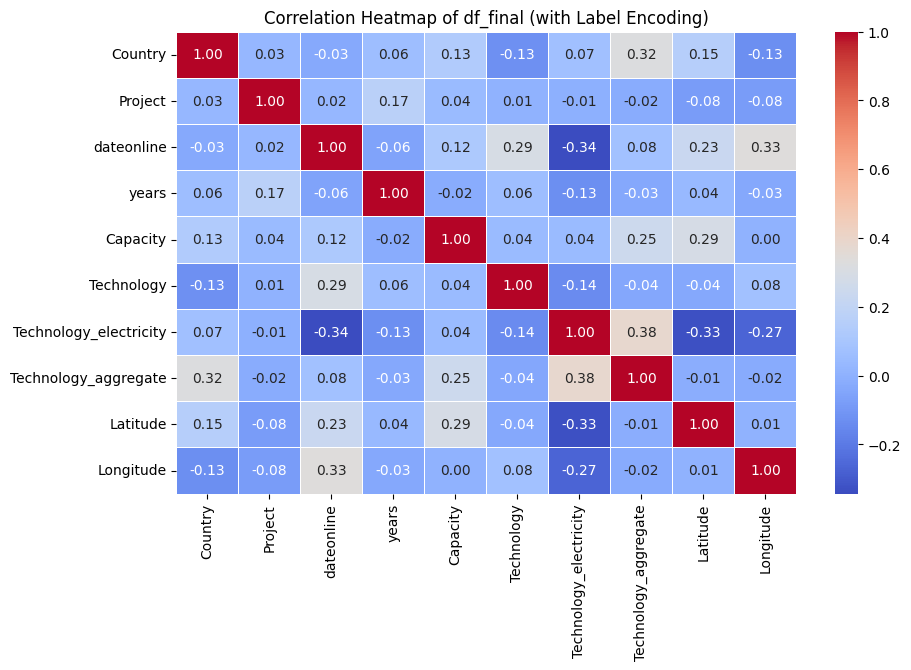

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df2_encoded = df2.copy()

non_numeric_cols = df2_encoded.select_dtypes(exclude=['number']).columns

# Apply Label Encoding to each non-numeric column
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    df2_encoded[col] = le.fit_transform(df2_encoded[col])
    label_encoders[col] = le  


df_numeric = df2_encoded.select_dtypes(include=['number'])


corr_matrix = df_numeric.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of df_final (with Label Encoding)")
plt.show()


<h3> Creating additional dataframes to ensure the dataset has production capacity for each year instead of all years combined </h3>

In [20]:
expanded_rows = []
for _, row in df.iterrows():
    if not np.isnan(row["Capacity"]):
        capacity_per_year = row["Capacity"] / row["years"]
        for year in range(int(row["dateonline"]), int(row["dateonline"] + row["years"])):
            expanded_rows.append({
                "Country": row["Country"],
                "Year": year,
                "Capacity": capacity_per_year
               
            })


df_expanded = pd.DataFrame(expanded_rows)
df_expanded

,Country,Year,Capacity
0,JPN,2020,0.564957
1,JPN,2021,0.564957
2,JPN,2022,0.564957
3,DEU,2019,0.074965
4,DEU,2020,0.074965
...,...,...,...
6380,GBR,2025,0.051976
6381,JPN,2024,0.131453
6382,JPN,2025,0.131453
6383,JPN,2026,0.131453


<h3> Duplicate of the dataframe, just exploring</h3>

In [21]:
expanded_rows2 = []
for _, row in df2.iterrows():
    if not np.isnan(row["Capacity"]): 
        capacity_per_year = row["Capacity"] / row["years"]
        for year in range(int(row["dateonline"]), int(row["dateonline"] + row["years"])):
            expanded_rows2.append({
                "Country": row["Country"],
                "Year": year,
                "Capacity": capacity_per_year,
                "Project": row["Project"]
            })


df_expanded2 = pd.DataFrame(expanded_rows2)
df_expanded2

,Country,Year,Capacity,Project
0,JPN,2020,0.564957,27
1,JPN,2021,0.564957,27
2,JPN,2022,0.564957,27
3,DEU,2019,0.074965,61
4,DEU,2020,0.074965,61
...,...,...,...,...
6380,GBR,2025,0.051976,13
6381,JPN,2024,0.131453,53
6382,JPN,2025,0.131453,53
6383,JPN,2026,0.131453,53


<h3> Duplicates to check whether technology also plays a role </h3>

In [22]:

expanded_rows3 = []
for _, row in df2.iterrows():
    if not np.isnan(row["Capacity"]):  
        capacity_per_year = row["Capacity"] / row["years"]
        for year in range(int(row["dateonline"]), int(row["dateonline"] + row["years"])):
            expanded_rows3.append({
                "Country": row["Country"],
                "Year": year,
                "Capacity": capacity_per_year,
                "Project": row["Project"],
                "Technology" : row["Technology"],
                "Technology_aggregate" : row["Technology_aggregate"]
                
            })


df_expanded3 = pd.DataFrame(expanded_rows3)
df_expanded3

,Country,Year,Capacity,Project,Technology,Technology_aggregate
0,JPN,2020,0.564957,27,ALK,Electrolysis
1,JPN,2021,0.564957,27,ALK,Electrolysis
2,JPN,2022,0.564957,27,ALK,Electrolysis
3,DEU,2019,0.074965,61,PEM,Electrolysis
4,DEU,2020,0.074965,61,PEM,Electrolysis
...,...,...,...,...,...,...
6380,GBR,2025,0.051976,13,Other Electrolysis,Electrolysis
6381,JPN,2024,0.131453,53,ALK,Electrolysis
6382,JPN,2025,0.131453,53,ALK,Electrolysis
6383,JPN,2026,0.131453,53,ALK,Electrolysis


<h3> Grouping by year and country</h3>

In [23]:

df_final = df_expanded.groupby(["Country", "Year"], as_index=False).sum()

print(df_final)

     Country  Year  Capacity
0        AUS  2021  0.014993
1        AUS  2022  0.014993
2        AUS  2023  0.014993
3        AUS  2024  0.014993
4        AUS  2025  0.014993
...      ...   ...       ...
6267     USA  2016  0.081480
6268     USA  2017  0.066667
6269     USA  2020  0.009125
6270     USA  2021  0.009125
6271     USA  2022  0.009125

[6272 rows x 3 columns]


In [24]:

df_final2 = df_expanded2.groupby(["Country", "Year"], as_index=False).sum()

print(df_final2)

     Country  Year  Capacity  Project
0        AUS  2021  0.014993       54
1        AUS  2022  0.014993       54
2        AUS  2023  0.014993       54
3        AUS  2024  0.014993       54
4        AUS  2025  0.014993       54
...      ...   ...       ...      ...
6267     USA  2016  0.081480      257
6268     USA  2017  0.066667       64
6269     USA  2020  0.009125       26
6270     USA  2021  0.009125       26
6271     USA  2022  0.009125       26

[6272 rows x 4 columns]


In [25]:

df_final3 = df_expanded3.groupby(["Country", "Year"], as_index=False).sum()

print(df_final3)

     Country  Year  Capacity  Project       Technology  \
0        AUS  2021  0.014993       54              PEM   
1        AUS  2022  0.014993       54              PEM   
2        AUS  2023  0.014993       54              PEM   
3        AUS  2024  0.014993       54              PEM   
4        AUS  2025  0.014993       54              PEM   
...      ...   ...       ...      ...              ...   
6267     USA  2016  0.081480      257  SOECPEMPEMOther   
6268     USA  2017  0.066667       64            Other   
6269     USA  2020  0.009125       26          Biomass   
6270     USA  2021  0.009125       26          Biomass   
6271     USA  2022  0.009125       26          Biomass   

                           Technology_aggregate  
0                                  Electrolysis  
1                                  Electrolysis  
2                                  Electrolysis  
3                                  Electrolysis  
4                                  Electrolysis  
...

<h3> For only years till 2024 </h3>

In [26]:
df_final.loc[df_final['Year'] <=2024]

,Country,Year,Capacity
0,AUS,2021,0.014993
1,AUS,2022,0.014993
2,AUS,2023,0.014993
3,AUS,2024,0.014993
5,AUT,2015,0.007497
...,...,...,...
6267,USA,2016,0.081480
6268,USA,2017,0.066667
6269,USA,2020,0.009125
6270,USA,2021,0.009125


In [27]:
df_final2.loc[df_final2['Year'] <=2024]

,Country,Year,Capacity,Project
0,AUS,2021,0.014993,54
1,AUS,2022,0.014993,54
2,AUS,2023,0.014993,54
3,AUS,2024,0.014993,54
5,AUT,2015,0.007497,107
...,...,...,...,...
6267,USA,2016,0.081480,257
6268,USA,2017,0.066667,64
6269,USA,2020,0.009125,26
6270,USA,2021,0.009125,26


In [28]:
df_final3.loc[df_final3['Year'] <=2024]

,Country,Year,Capacity,Project,Technology,Technology_aggregate
0,AUS,2021,0.014993,54,PEM,Electrolysis
1,AUS,2022,0.014993,54,PEM,Electrolysis
2,AUS,2023,0.014993,54,PEM,Electrolysis
3,AUS,2024,0.014993,54,PEM,Electrolysis
5,AUT,2015,0.007497,107,PEM,Electrolysis
...,...,...,...,...,...,...
6267,USA,2016,0.081480,257,SOECPEMPEMOther,ElectrolysisElectrolysisElectrolysisOther
6268,USA,2017,0.066667,64,Other,Other
6269,USA,2020,0.009125,26,Biomass,Other
6270,USA,2021,0.009125,26,Biomass,Other


In [29]:
df_final #= df_final.loc[df_final['Year'] <=2024]


,Country,Year,Capacity
0,AUS,2021,0.014993
1,AUS,2022,0.014993
2,AUS,2023,0.014993
3,AUS,2024,0.014993
4,AUS,2025,0.014993
...,...,...,...
6267,USA,2016,0.081480
6268,USA,2017,0.066667
6269,USA,2020,0.009125
6270,USA,2021,0.009125


<h3> Performing K means clustering to see the country profiles </h3>

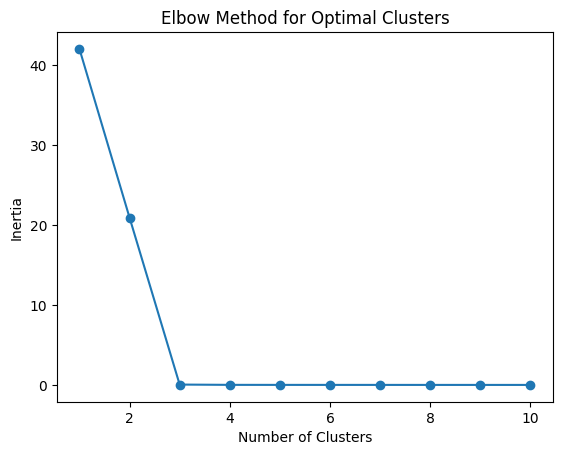

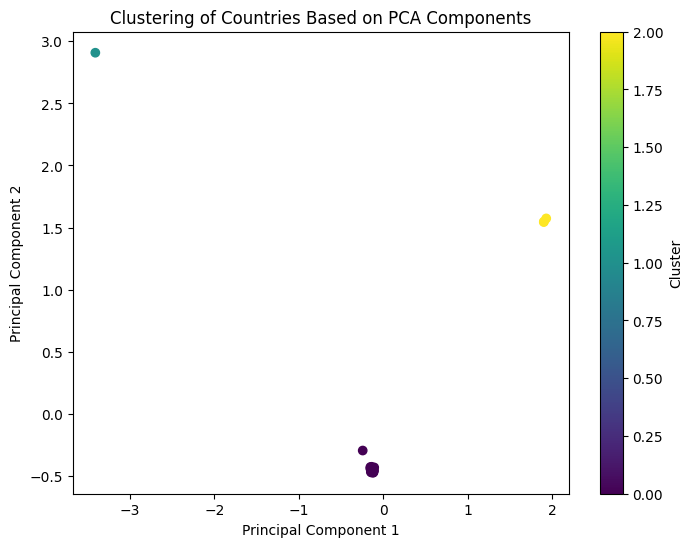

Countries in Cluster 0:
['AUS', 'AUT', 'CAN', 'CHE', 'COK', 'DEU', 'DNK', 'ESP', 'GBR', 'GRC', 'ISL', 'NOR', 'NZL', 'PRT', 'SWE', 'TUR', 'USA']

Countries in Cluster 1:
['NLD']

Countries in Cluster 2:
['FRA', 'ITA', 'JPN']



In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#group by country
df_country = df_final.groupby('Country').agg({'Year': 'mean', 'Capacity': 'mean'}).reset_index()

#standardise feature for clustering
features = df_country[['Year', 'Capacity']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#PCA applied to reduce dimensions
pca = PCA(n_components=2)  #reduced to 2 components for visualisation
pca_components = pca.fit_transform(scaled_features)

#elbow method
inertias = []
for i in range(1, 11):  #trying from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_components) 
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


optimal_clusters = 3  #number as per elbow method

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_country['Cluster'] = kmeans.fit_predict(pca_components)


plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_country['Cluster'], cmap='viridis')
plt.title('Clustering of Countries Based on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


for cluster_num in range(optimal_clusters):
    countries_in_cluster = df_country[df_country['Cluster'] == cluster_num]['Country']
    print(f"Countries in Cluster {cluster_num}:")
    print(countries_in_cluster.to_list())
    print()


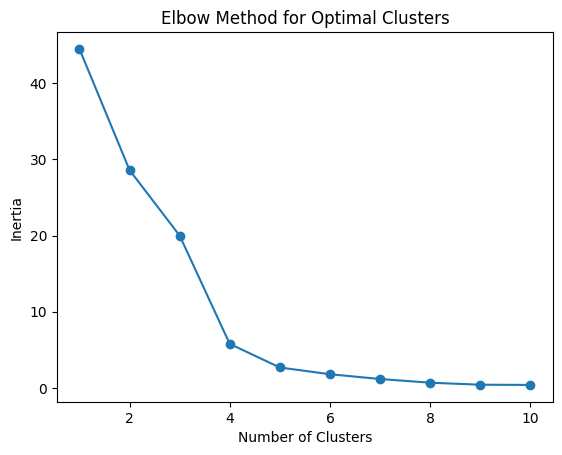

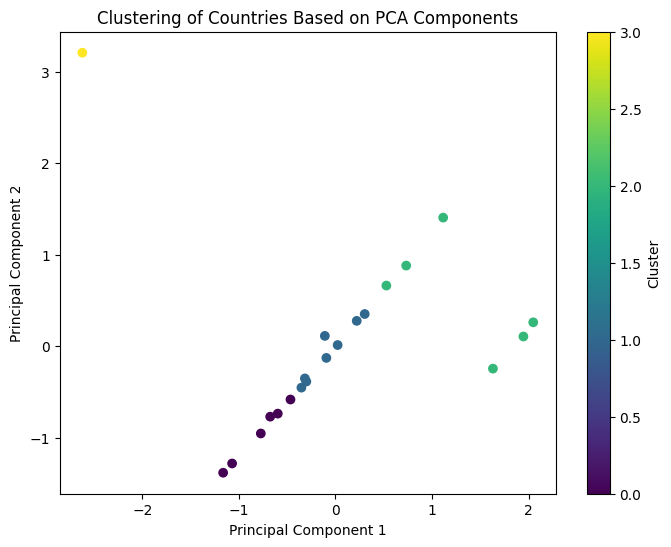

Countries in Cluster 0:
['AUS', 'COK', 'ESP', 'GRC', 'ISL', 'SWE']

Countries in Cluster 1:
['AUT', 'CAN', 'GBR', 'NOR', 'NZL', 'PRT', 'TUR', 'USA']

Countries in Cluster 2:
['CHE', 'DEU', 'DNK', 'FRA', 'ITA', 'JPN']

Countries in Cluster 3:
['NLD']



In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df_country2 = df_final2.groupby('Country').agg({
    'Year': 'mean',       
    'Capacity': 'mean',  
    'Project': 'mean'     
}).reset_index()


features2 = df_country2[['Year', 'Capacity', 'Project']]

scaler2 = StandardScaler()
scaled_features2 = scaler2.fit_transform(features2)


pca2 = PCA(n_components=2)
pca_components2 = pca2.fit_transform(scaled_features2)


inertias2 = []
for i in range(1, 11): 
    kmeans2 = KMeans(n_clusters=i, random_state=42)
    kmeans2.fit(pca_components2)  
    inertias2.append(kmeans2.inertia_)


plt.plot(range(1, 11), inertias2, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


optimal_clusters2 = 4 

kmeans2 = KMeans(n_clusters=optimal_clusters2, random_state=42)
df_country2['Cluster'] = kmeans2.fit_predict(pca_components2)


plt.figure(figsize=(8, 6))
plt.scatter(pca_components2[:, 0], pca_components2[:, 1], c=df_country2['Cluster'], cmap='viridis')
plt.title('Clustering of Countries Based on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


for cluster_num in range(optimal_clusters2):
    countries_in_cluster2 = df_country2[df_country2['Cluster'] == cluster_num]['Country']
    print(f"Countries in Cluster {cluster_num}:")
    print(countries_in_cluster2.to_list())
    print()


<h3> Performing K means clustering on another dataframe that includes technology to check country profiles </h3>

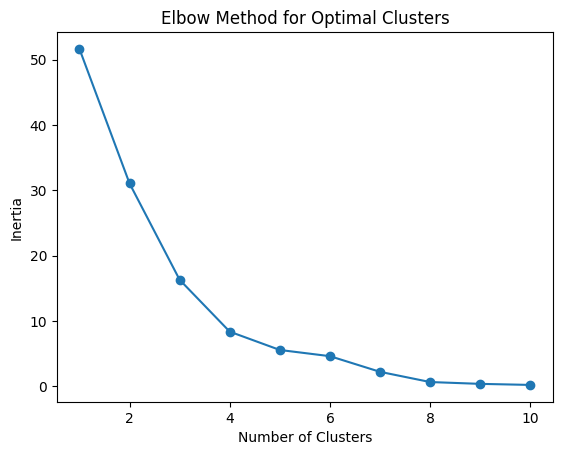

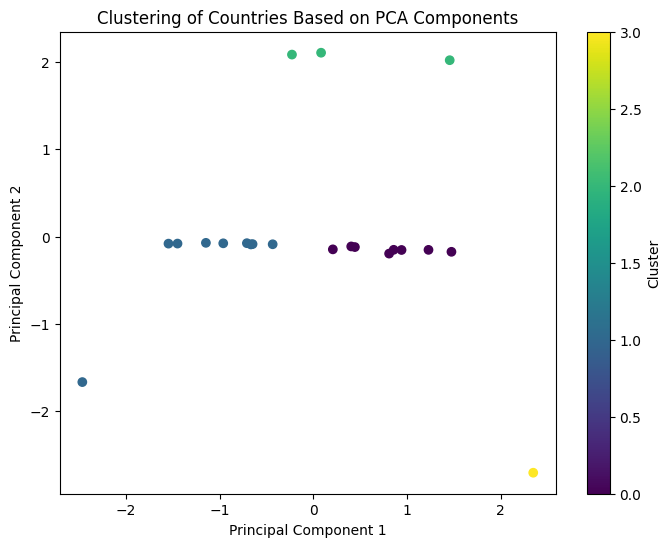

Countries in Cluster 0:
['AUS', 'AUT', 'CHE', 'DEU', 'DNK', 'ESP', 'NOR', 'PRT']

Countries in Cluster 1:
['CAN', 'COK', 'GBR', 'GRC', 'ISL', 'NLD', 'NZL', 'SWE', 'TUR']

Countries in Cluster 2:
['FRA', 'ITA', 'JPN']

Countries in Cluster 3:
['USA']



In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df_country3 = df_final3.groupby('Country').agg({
    'Year': 'mean', 
    'Capacity': 'mean', 
    'Project': 'mean', 
    'Technology': 'first',  
    'Technology_aggregate': 'first'  
}).reset_index()


label_encoder3 = LabelEncoder()

df_country3['Technology_encoded'] = label_encoder3.fit_transform(df_country3['Technology'])
df_country3['Technology_aggregate_encoded'] = label_encoder3.fit_transform(df_country3['Technology_aggregate'])


features3 = df_country3[['Year', 'Capacity', 'Project', 'Technology_encoded', 'Technology_aggregate_encoded']]


scaler3 = StandardScaler()
scaled_features3 = scaler3.fit_transform(features3)


pca3 = PCA(n_components=2) 
pca_components3 = pca3.fit_transform(scaled_features3)


inertias3 = []
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i, random_state=42)
    kmeans3.fit(pca_components3)  
    inertias3.append(kmeans3.inertia_)


plt.plot(range(1, 11), inertias3, marker='o')  #how inertia is calculated
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


optimal_clusters3 = 4  

kmeans3 = KMeans(n_clusters=optimal_clusters3, random_state=42)
df_country3['Cluster'] = kmeans3.fit_predict(pca_components3)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components3[:, 0], pca_components3[:, 1], c=df_country3['Cluster'], cmap='viridis')
plt.title('Clustering of Countries Based on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


for cluster_num in range(optimal_clusters3):
    countries_in_cluster3 = df_country3[df_country3['Cluster'] == cluster_num]['Country']
    print(f"Countries in Cluster {cluster_num}:")
    print(countries_in_cluster3.to_list())
    print()

    #explainable AI explain clusters 


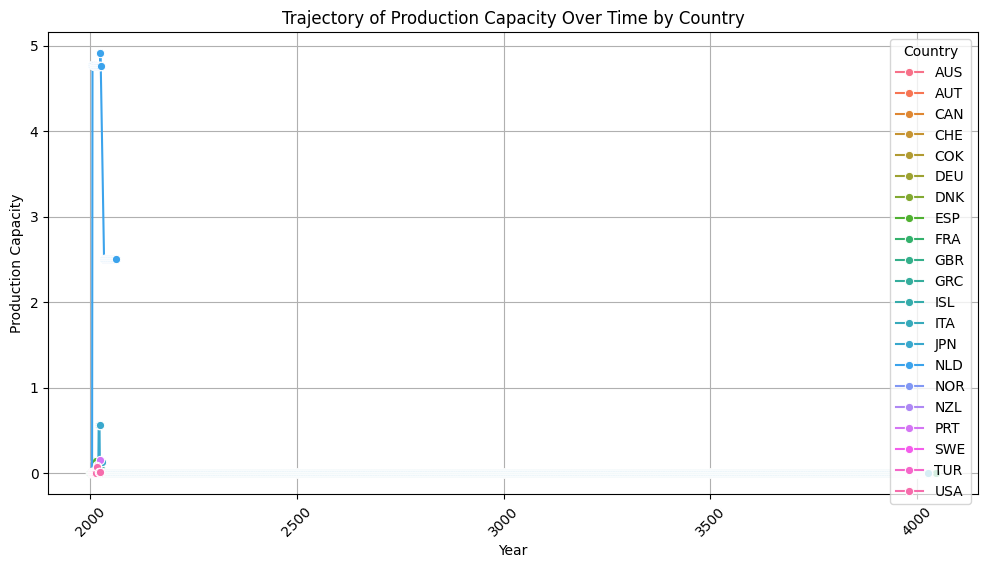

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_final, x="Year", y="Capacity", hue="Country", marker="o")


plt.xlabel("Year")
plt.ylabel("Production Capacity")
plt.title("Trajectory of Production Capacity Over Time by Country")


plt.legend(title="Country")
plt.grid(True)
plt.xticks(rotation=45)


plt.show()


In [34]:
def plot_trend(df, exp = True): 
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x="Year", y="Capacity", hue="Country", marker="o")
    
   
    plt.xlabel("Year")
    plt.ylabel("Production Capacity")
    plt.title("Trajectory of Production Capacity Over Time by Country")
    if exp:
        #set log scale for y-axis (Country)
        plt.yscale("log")
   
    plt.legend(title="Country")
    plt.grid(True)
    plt.xticks(rotation=45)
    
 
    plt.show()

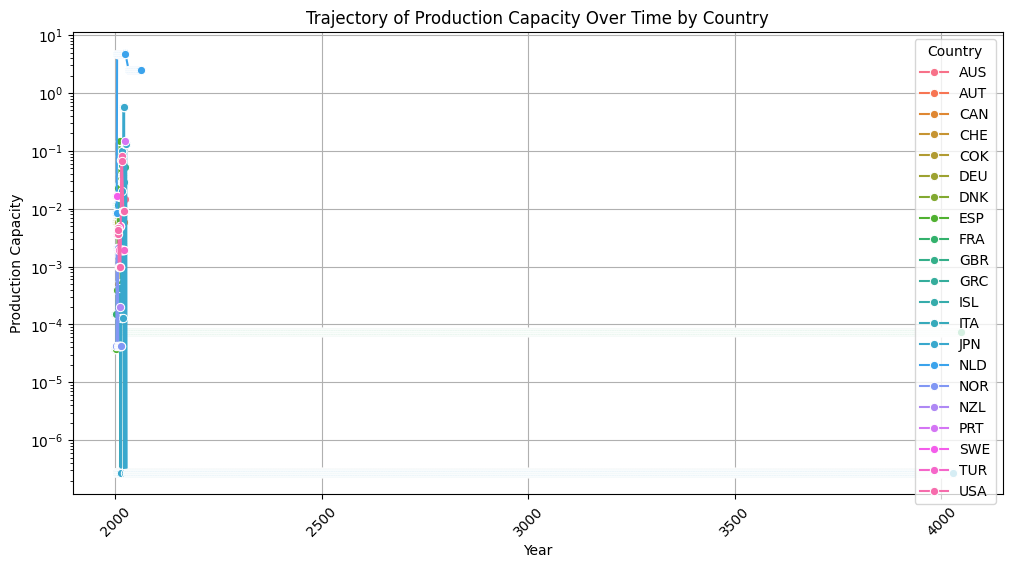

In [35]:

plot_trend(df_final)

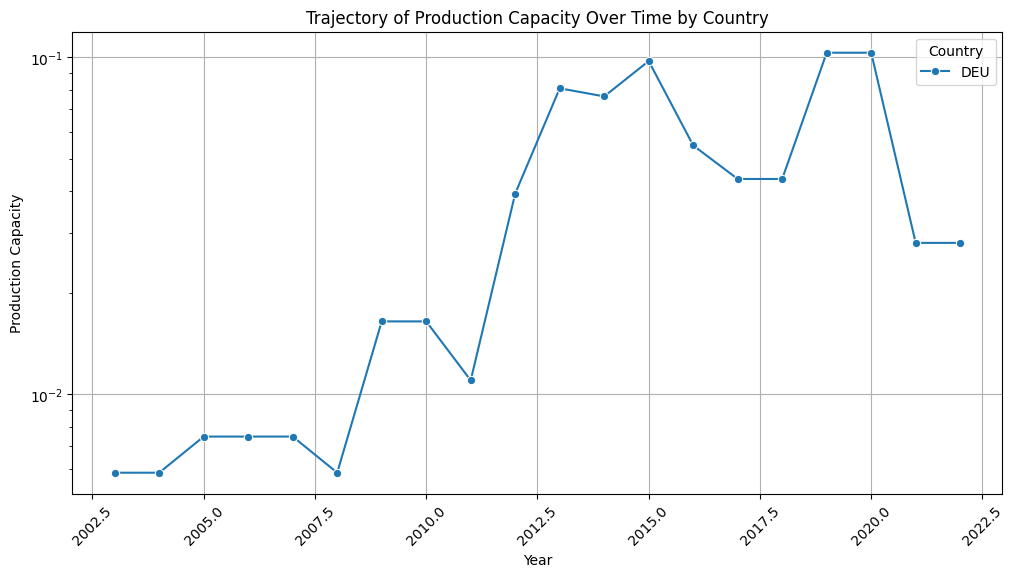

In [36]:
df_DEU = df_final.loc[df_final['Country']== 'DEU']
plot_trend(df_DEU)

In [37]:
df_final3

,Country,Year,Capacity,Project,Technology,Technology_aggregate
0,AUS,2021,0.014993,54,PEM,Electrolysis
1,AUS,2022,0.014993,54,PEM,Electrolysis
2,AUS,2023,0.014993,54,PEM,Electrolysis
3,AUS,2024,0.014993,54,PEM,Electrolysis
4,AUS,2025,0.014993,54,PEM,Electrolysis
...,...,...,...,...,...,...
6267,USA,2016,0.081480,257,SOECPEMPEMOther,ElectrolysisElectrolysisElectrolysisOther
6268,USA,2017,0.066667,64,Other,Other
6269,USA,2020,0.009125,26,Biomass,Other
6270,USA,2021,0.009125,26,Biomass,Other


<h1> Started working on Germany's forecasting </h1>

In [38]:
import pandas as pd


df_final3["Year"] = pd.to_datetime(df_final3["Year"], format='%Y', errors='coerce')


country = "DEU"  
time_series = df_final3[df_final3["Country"] == country].set_index("Year")["Capacity"]


print(time_series.head())


Year
2003-01-01    0.005847
2004-01-01    0.005847
2005-01-01    0.007485
2006-01-01    0.007485
2007-01-01    0.007485
Name: Capacity, dtype: float64


<h3> Finding out trends via STL </h3>

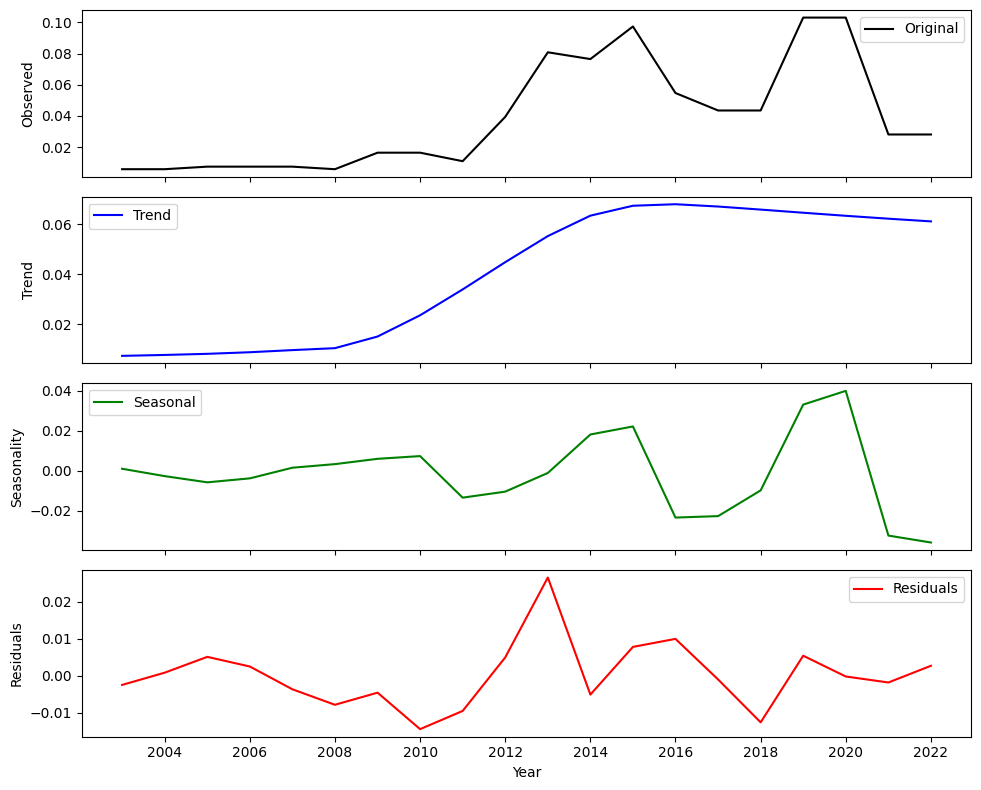

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

period = 5  #5 shows a cycle
stl = STL(time_series, period=period)
result = stl.fit()


fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(result.observed, label="Original", color="black")
axes[0].set_ylabel("Observed")
axes[0].legend()

axes[1].plot(result.trend, label="Trend", color="blue")
axes[1].set_ylabel("Trend")
axes[1].legend()

axes[2].plot(result.seasonal, label="Seasonal", color="green")
axes[2].set_ylabel("Seasonality")
axes[2].legend()

axes[3].plot(result.resid, label="Residuals", color="red")
axes[3].set_ylabel("Residuals")
axes[3].legend()

plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [38]:
def check_stationarity(time_series):
    
    adf_result = adfuller(time_series)


    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    print("Critical Values:", adf_result[4])

 
    if adf_result[1] < 0.05:
        print("The data is stationary (reject null hypothesis).")
    else:
        print("The data is non-stationary (fail to reject null hypothesis).")





<h1> Making the dataset Stationary</h1>

ADF Statistic after log differencing: -3.9682281628919687
p-value after log differencing: 0.0015863268776714328
Critical Values: {'1%': np.float64(-3.889265672705068), '5%': np.float64(-3.0543579727254224), '10%': np.float64(-2.66698384083045)}


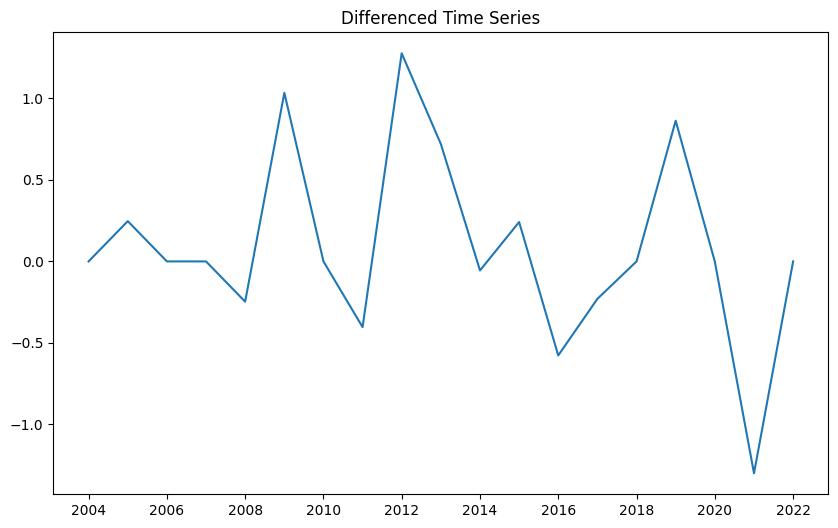

The differenced series is likely stationary.


In [39]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt




time_series_diff = time_series.diff().dropna()
import numpy as np

time_series_log = np.log(time_series)


time_series_log_diff = time_series_log.diff().dropna()


adf_result_log_diff = adfuller(time_series_log_diff)
print(f"ADF Statistic after log differencing: {adf_result_log_diff[0]}")
print(f"p-value after log differencing: {adf_result_log_diff[1]}")
print(f"Critical Values: {adf_result_log_diff[4]}")


plt.figure(figsize=(10, 6))
plt.plot(time_series_log_diff)
plt.title('Differenced Time Series')
plt.show()



if adf_result_log_diff[1] < 0.05:
    print("The differenced series is likely stationary.")
else:
    print("The differenced series is still likely non-stationary.")


<h3> Train Test split </h3>

Training data length: 15
Testing data length: 4


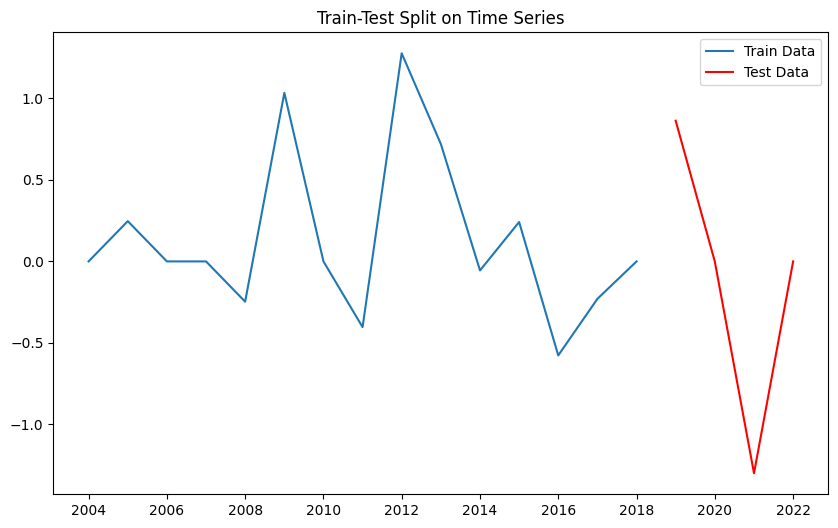

In [40]:
import pandas as pd
import numpy as np


split_ratio = 0.8


split_index = int(len(time_series_log_diff) * split_ratio)


train_data = time_series_log_diff[:split_index]


test_data = time_series_log_diff[split_index:]


print(f"Training data length: {len(train_data)}")
print(f"Testing data length: {len(test_data)}")


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data', color='red')
plt.legend()
plt.title('Train-Test Split on Time Series')
plt.show()


<h3> Choosing the parameters for SARIMA </h3>

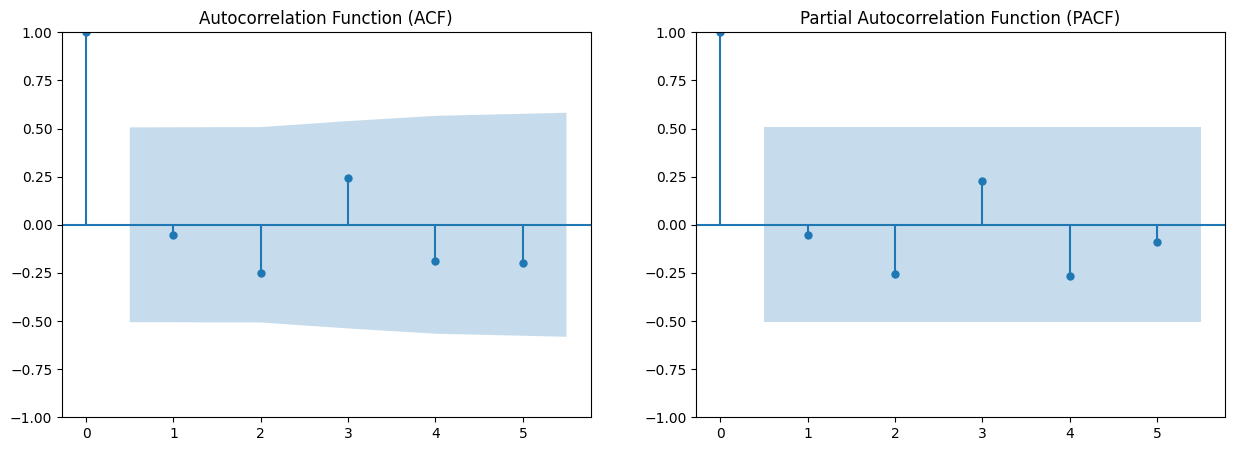

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(train_data, ax=axes[0], lags=5)
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(train_data, ax=axes[1], lags=5, method='ywm')
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

<h2> SARIMA forecasting </h2>

C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


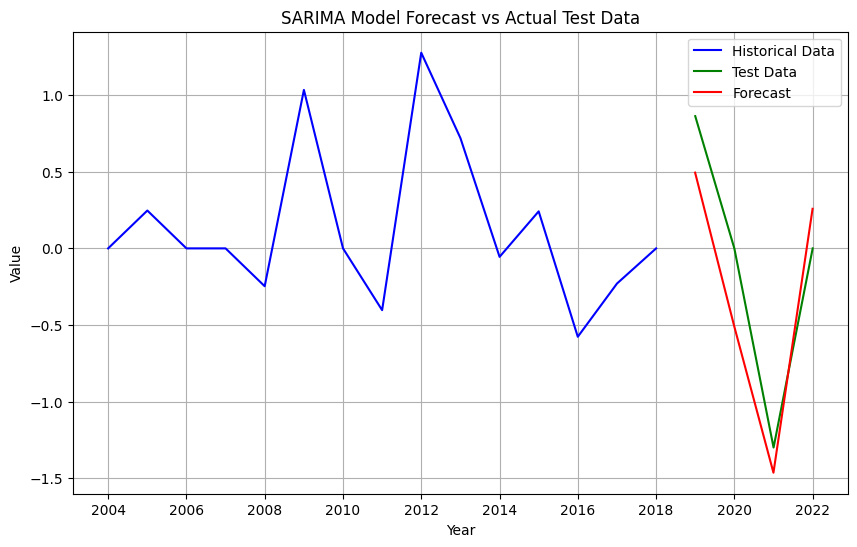

RMSE: 0.3492321751296602
MAE: 0.32480902942402423

Actual Test Data vs Forecasted Test Data:
            Actual Test Data  Predicted Test Data
2019-01-01          0.862727             0.494123
2020-01-01          0.000000            -0.508325
2021-01-01         -1.299283            -1.463440
2022-01-01          0.000000             0.258149


In [89]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error



sarima_model = SARIMAX(train_data,
                       order=(2, 1, 1),     
                       seasonal_order=(1, 1, 1, 5), 
                       enforce_stationarity=False,
                       enforce_invertibility=False)


sarima_result = sarima_model.fit(disp=False)


forecast_steps = len(test_data)
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), 
                               periods=forecast_steps, 
                               freq='A')  #'A' means annual frequency for year-end


forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()


plt.figure(figsize=(10, 6))


plt.plot(train_data.index, train_data, label='Historical Data', color='blue')

plt.plot(test_data.index, test_data, label='Test Data', color='green')


plt.plot(forecast_index, forecast_values, label='Forecast', color='red')


#plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)


plt.title('SARIMA Model Forecast vs Actual Test Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)


plt.show()



rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
mae = mean_absolute_error(test_data, forecast_values)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


print("\nActual Test Data vs Forecasted Test Data:")
comparison_df = pd.DataFrame({
    'Actual Test Data': test_data,
    'Predicted Test Data': forecast_values
})
print(comparison_df)

<h3> Grid search for SARIMA's lowest RMSE score parameters </h3>

In [93]:
import itertools

#grid serach
p = d = q = range(0, 3)  
P = D = Q = range(0, 2)  
seasonal_periods = [5] 


param_grid = list(itertools.product(p, d, q, P, D, Q, seasonal_periods))

best_rmse = float('inf')  
best_params = None  

for param in param_grid:
    try:
     
        sarima_model = SARIMAX(train_data,
                               order=(param[0], param[1], param[2]),
                               seasonal_order=(param[3], param[4], param[5], param[6]),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
        sarima_result = sarima_model.fit(disp=False)


        forecast = sarima_result.get_forecast(steps=len(test_data))
        forecast_values = forecast.predicted_mean

   
        rmse = np.sqrt(((forecast_values - test_data) ** 2).mean())
        
       
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = param
    except Exception as e:
        continue

print(f"Best parameters: {best_params} with RMSE: {best_rmse}")


C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\parsh\AppData\Lo

Best parameters: (2, 1, 1, 1, 1, 1, 5) with RMSE: 0.3492321751296602


C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


<h3> Forecasting for the next decade </h3>

C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


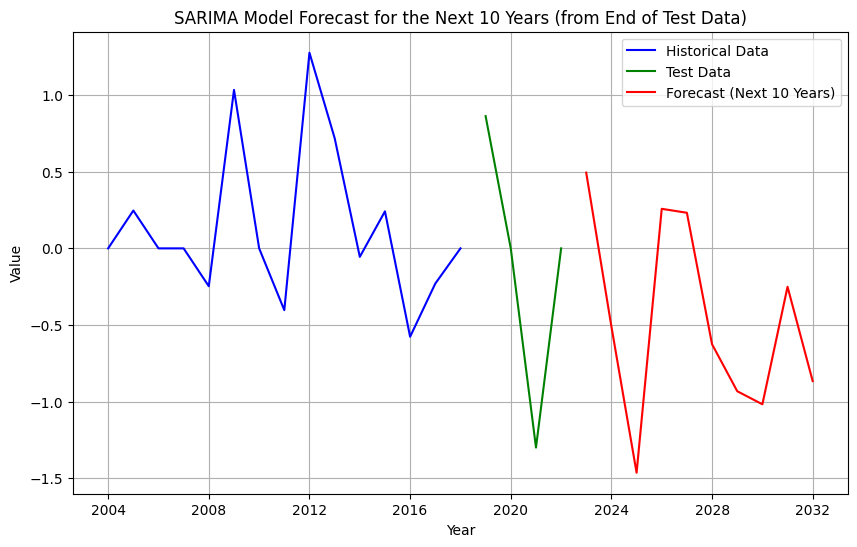

Forecasted values for the next 10 years (from End of Test Data):
2019-01-01    0.494123
2020-01-01   -0.508325
2021-01-01   -1.463440
2022-01-01    0.258149
2023-01-01    0.232449
2024-01-01   -0.624959
2025-01-01   -0.931768
2026-01-01   -1.016981
2027-01-01   -0.250471
2028-01-01   -0.865912
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [88]:
#Forecasting
sarima_result = sarima_model.fit(disp=False)

forecast_steps = 10  
forecast = sarima_result.get_forecast(steps=forecast_steps)


forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1),
                               periods=forecast_steps, freq='A')  

#range of future values that may fall in
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()


plt.figure(figsize=(10, 6))


plt.plot(train_data.index, train_data, label='Historical Data', color='blue')


plt.plot(test_data.index, test_data, label='Test Data', color='green')


plt.plot(forecast_index, forecast_values, label='Forecast (Next 10 Years)', color='red')


plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)


plt.title('SARIMA Model Forecast for the Next 10 Years (from End of Test Data)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


print("Forecasted values for the next 10 years (from End of Test Data):")
print(forecast_values)

<h3> SARIMA forecast in the original scale </h3>

C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\parsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


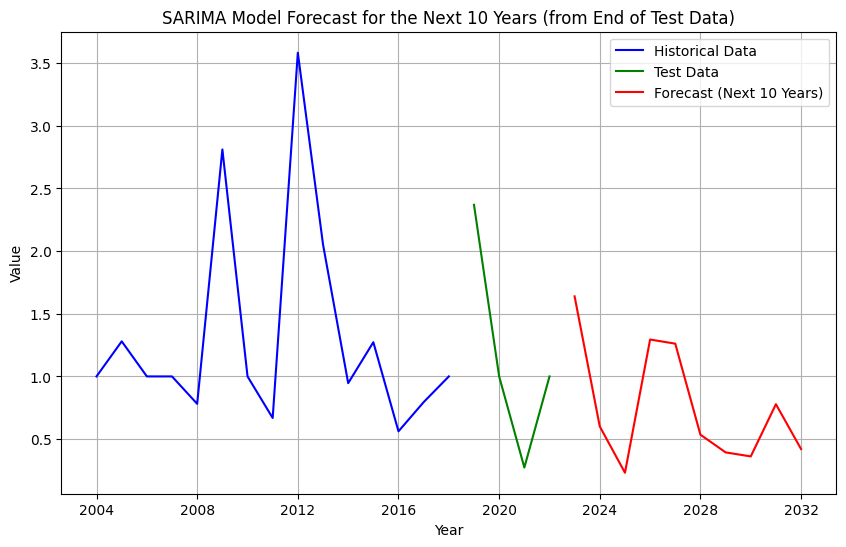

Unlogged forecasted values for the next 10 years (from End of Test Data):
2019-01-01    1.639060
2020-01-01    0.601502
2021-01-01    0.231439
2022-01-01    1.294531
2023-01-01    1.261686
2024-01-01    0.535283
2025-01-01    0.393857
2026-01-01    0.361685
2027-01-01    0.778434
2028-01-01    0.420668
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarima_model = SARIMAX(train_data,
                       order=(2, 1, 1),    
                       seasonal_order=(1, 1, 1, 5), 
                       enforce_stationarity=False,
                       enforce_invertibility=False)


sarima_result = sarima_model.fit(disp=False)

forecast_steps = 10  
forecast = sarima_result.get_forecast(steps=forecast_steps)


forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1),
                               periods=forecast_steps, freq='A')  


forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()


forecast_values_unlogged = np.exp(forecast_values)  
forecast_ci_unlogged = np.exp(forecast_ci) 


plt.figure(figsize=(10, 6))


plt.plot(train_data.index, np.exp(train_data), label='Historical Data', color='blue')


plt.plot(test_data.index, np.exp(test_data), label='Test Data', color='green')


plt.plot(forecast_index, forecast_values_unlogged, label='Forecast (Next 10 Years)', color='red')


plt.fill_between(forecast_index, forecast_ci_unlogged.iloc[:, 0], forecast_ci_unlogged.iloc[:, 1], color='pink', alpha=0.3)


plt.title('SARIMA Model Forecast for the Next 10 Years (from End of Test Data)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)


plt.show()


print("Unlogged forecasted values for the next 10 years (from End of Test Data):")
print(forecast_values_unlogged)


<h1> LSTM model forecasting </h1>

In [57]:
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


df_germany = df_final3[df_final3["Country"] == "DEU"].copy()
df_germany = df_germany[["Year", "Capacity"]].set_index("Year") 
dataset = df_germany.values.reshape(-1, 1)  #transform numPy to an array

#Scaling the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#a function to create a dataset to store the trainX, trainY, testX, and testY
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i : i + look_back, 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#3 works better.
look_back = 3

#train-test split
train_size = int(len(dataset) * 0.8)
train, test = dataset[0:train_size, :], dataset[train_size:, :]

#the sequences
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#reshaping input to samples, timesteps, and features.
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],  testX.shape[1], 1))

#build the model
model = Sequential()
model.add(LSTM(25, return_sequences=False, input_shape=(look_back, 1)))
#model.add(LSTM(15, return_sequences=True))
#model.add(LSTM(5, return_sequences=False))
model.add(Dropout(0.1))  #this is for overfitting
model.add(Dense(1))  #output


model.compile(loss="mse", optimizer="adam")

#train the model
#history = model.fit(trainX, trainY, epochs=1000, batch_size=16, verbose=1, callbacks=[history])
history = model.fit(trainX, trainY, epochs=1000, batch_size=16, verbose=1, validation_data=(testX, testY))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

#calcualte rmse
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(f"Train Score: {trainScore:.2f} RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f"Test Score: {testScore:.2f} RMSE")



if isinstance(df_germany.index[-1], pd.Timestamp):
    future_years = pd.date_range(start=df_germany.index[-1] + pd.DateOffset(years=1), periods=10, freq='Y')
else:
    future_years = np.arange(df_germany.index[-1] + 1, df_germany.index[-1] + 11)


future_predictions = []


last_inputs = dataset[-look_back:].flatten().tolist()

for _ in range(10):
    input_data = np.array(last_inputs[-look_back:]).reshape(1, look_back, 1)
    
    #next year prediction
    next_year_pred = model.predict(input_data)
    

    next_year_pred_original = scaler.inverse_transform(next_year_pred)[0][0]
    
    #store them
    future_predictions.append(next_year_pred_original)
    
    #append it to the list for future predictions
    last_inputs.append(next_year_pred[0, 0])
 

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2344 - val_loss: 0.0743
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 0.2329 - val_loss: 0.0681
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.2238 - val_loss: 0.0622
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 0.2100 - val_loss: 0.0565
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - loss: 0.2072 - val_loss: 0.0511
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 0.2025 - val_loss: 0.0460
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 0.2016 - val_loss: 0.0411
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 0.1997 - val_loss: 0.0365
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 0.1805 - val_loss: 0.0322
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 0.1810 - val_loss: 0.0282
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.1831 - val_loss: 0.0244
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - 

In [58]:
print(f"Train Actual Values: {trainY[:5]}")
print(f"Train Predicted Values: {trainPredict[:5]}")
print(f"Test Actual Values: {testY[:5]}")
print(f"Test Predicted Values: {testPredict[:5]}")


Train Actual Values: [[0.00748454 0.00748454 0.0058473  0.01644023 0.01644023 0.0109884
  0.03937747 0.08081703 0.07647121 0.09736288 0.054705   0.04349965
  0.04349965]]
Train Predicted Values: [[0.00566058]
 [0.00774819]
 [0.0113946 ]
 [0.01024232]
 [0.0157251 ]]
Test Actual Values: [[0.02811202]]
Test Predicted Values: [[0.02481705]]


<h3> Model loss over training </h3>

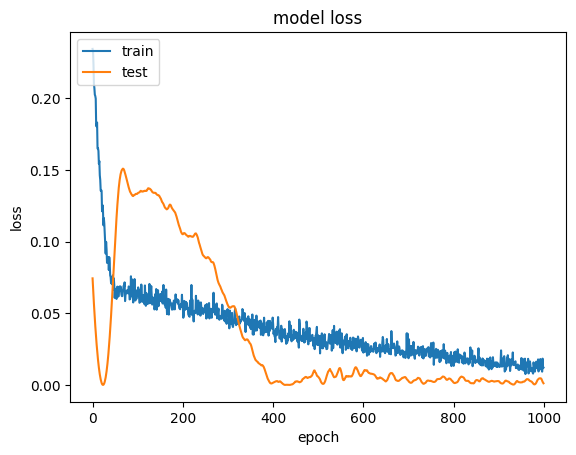

In [61]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h3> Forecasting the next decade using LSTM </h3>

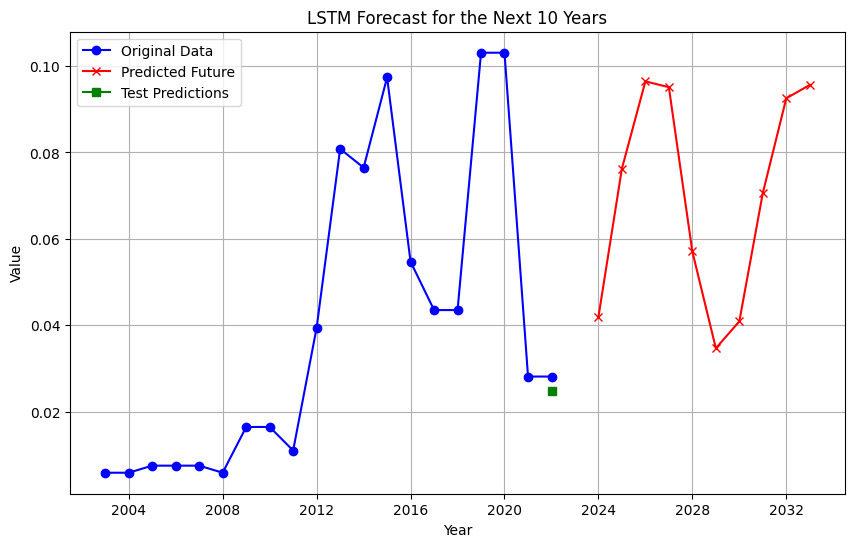

In [60]:
plt.figure(figsize=(10, 6))


plt.plot(df_germany.index, df_germany.values, label="Original Data", color='blue', marker='o')

plt.plot(future_years, future_predictions, label="Predicted Future", color='red', marker='x')


test_years = df_germany.index[-len(testPredict):]  


plt.plot(test_years, testPredict, label="Test Predictions", color='green', marker='s')


plt.xlabel('Year')
plt.ylabel('Value')
plt.title('LSTM Forecast for the Next 10 Years')


plt.legend()


plt.grid(True)


plt.show()
